In [91]:
import numpy as np

In [92]:
def get_actions(s):
    return range(min(s, 100-s)+1)

In [93]:
def one_step_lookahead(p_heads, gamma, V, s, R):
    # Minimum bet is 0, maximum bet is min(s,100-s)
    q = []
    for a in get_actions(s):
        # Expected value of action is the sum of the immediate rewards and the value of the next state
        q.append(p_heads * (R[s+a] + V[s+a]*gamma) + (1-p_heads) * (R[s-a] + V[s-a]*gamma))
    return q

In [98]:
def value_iteration(p_heads, theta=0.00001, gamma=1.0):
    # Reward is zero in all states except the one in which the gambler
    # reaches state 100 in which the reward is +1.
    # We introduce two dummy states corresponding to termination with capital 0 and 100
    R = np.zeros(101)
    R[100] = 1
    V = np.zeros(101)
    sweeps = []
    
    delta = 1
    while delta > theta:
        delta = 0
        # Update each state (except terminal states) in a sweep
        sweeps.append(V.copy())
        for s in range(1, 100):
            tmp = V[s]
            
            q = one_step_lookahead(p_heads, gamma, V, s, R)
            
            best_action_value = np.max(q)
            
            V[s] = best_action_value
            delta = max(delta, abs(tmp - V[s]))
    
    # Create deterministic policy using optimal value function
    pi = np.zeros(101)
    for s in range(1, 100):
        # One step lookahed to find best action for this state
        q = one_step_lookahead(p_heads, gamma, V, s, R)
        # Always pick the best action        
        best_action = get_actions(s)[np.argmax(np.round(q[1:], 5)) + 1]
        pi[s] = best_action
    return pi, V, sweeps
            

In [99]:
pi_opt, v_opt, sweeps = value_iteration(0.4, theta=1e-9, gamma=1)

print("Optimal policy: {}".format(pi_opt))

print("Optimal value function: {}".format(v_opt))

Optimal policy: [ 0.  1.  0.  3.  4.  5.  0.  7.  8.  9. 10. 11.  0. 13. 14. 15. 16. 17.
 18. 19. 20. 21. 22. 23. 24.  0.  0.  2.  0.  4.  5.  0.  7.  8.  9. 10.
 11. 12.  0.  0. 40. 41. 42. 43.  0. 45. 46.  0. 48. 49.  0.  0.  2.  0.
  4.  5.  0.  7.  8.  9. 10. 11. 12.  0.  0. 15. 16. 17. 18.  0. 20. 21.
  0. 23. 24.  0.  1.  2.  0.  4.  5.  6.  0.  8.  9. 10.  0. 12.  0.  0.
  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.]
Optimal value function: [0.         0.00206562 0.00516406 0.00922547 0.01291015 0.0173854
 0.02306368 0.02781411 0.03227539 0.03768507 0.0434635  0.05035447
 0.05765919 0.06523937 0.06953528 0.07443124 0.08068847 0.08661104
 0.09421268 0.10314362 0.10865874 0.11596663 0.12588617 0.13357998
 0.14414799 0.16       0.16309844 0.16774609 0.17383821 0.17936523
 0.1860781  0.19459552 0.20172117 0.20841308 0.21652761 0.22519525
 0.2355317  0.24648879 0.25785906 0.26430292 0.27164686 0.2810327
 0.28991657 0.30131902 0.31471544 0.32298812 0.33394994 0.34882926
 0.36036996 0.3

Text(0.5,1,'Optimal Policy vs State')

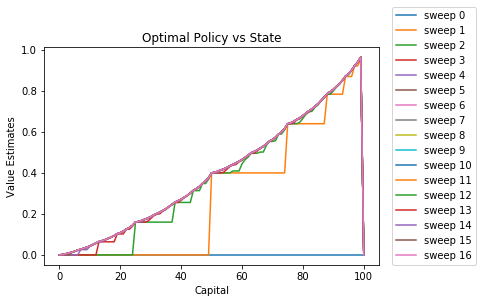

In [100]:
import matplotlib.pyplot as plt
# Plot optimal policy vs state
for sweep, state_value in enumerate(sweeps):
    plt.plot(state_value, label='sweep {}'.format(sweep))
plt.xlabel('Capital')
plt.ylabel('Value Estimates')
plt.legend(loc=(1.04, 0))

plt.title('Optimal Policy vs State')

Text(0.5,1,'Capital vs Optimal Policy')

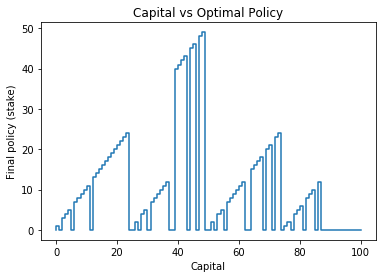

In [102]:
# Plot Capital vs Optimal Policy
plt.step(range(0,101), pi_opt)
plt.xlabel('Capital')
plt.ylabel('Final policy (stake)')
plt.title('Capital vs Optimal Policy')